In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import variation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set_theme()

# )
Compare as 4 medições das 3 espécies usando gráficos boxplot. Que características destas medições consegue comparar?

In [2]:
iris = pd.read_csv("iris.csv", names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])
especies = iris['class'].unique()
atributos = iris.columns

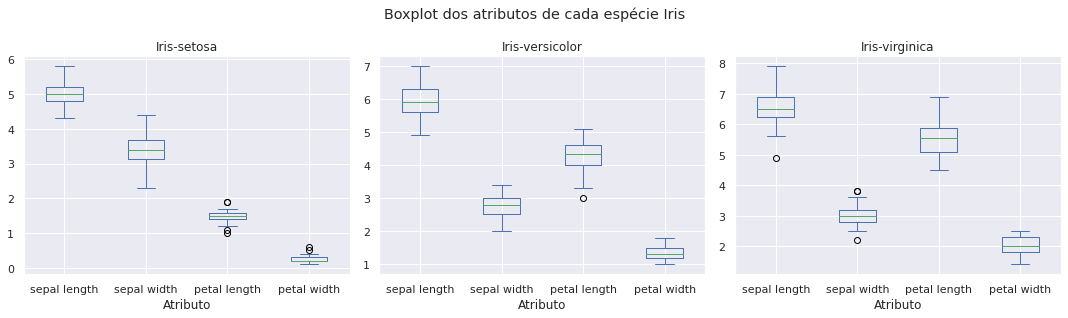

In [3]:
fig, ax = plt.subplots(ncols=3, figsize=(15,4.5))
for i, e in enumerate(especies):    
    iris[iris['class'] == e][['sepal length', 'sepal width', 'petal length', 'petal width']].plot(kind='box', ax=ax[i])
    ax[i].set_xlabel("Atributo")
    ax[i].set_title(e)
plt.suptitle("Boxplot dos atributos de cada espécie Iris")
plt.tight_layout()

Pela figura, nota-se que os *boxplots* das espécies Iris-versicolor e Iris-virginica são parecidos, com uma leve difença entre os valores de cada atributo. Nessas duas espécies, a maioria das larguras (*sepal width*, *petal width*) de cada atributo são menores que os comprimentos (*sepal length*, *petal length*). Na espécie Iris-setosa, por outro lado, isso não acontece, com a largura da sépala/pétala sendo menor que o comprimento da sépala/pétala.

# )
Repita a análise usando histogramas. Quais distribuições são simétricas?

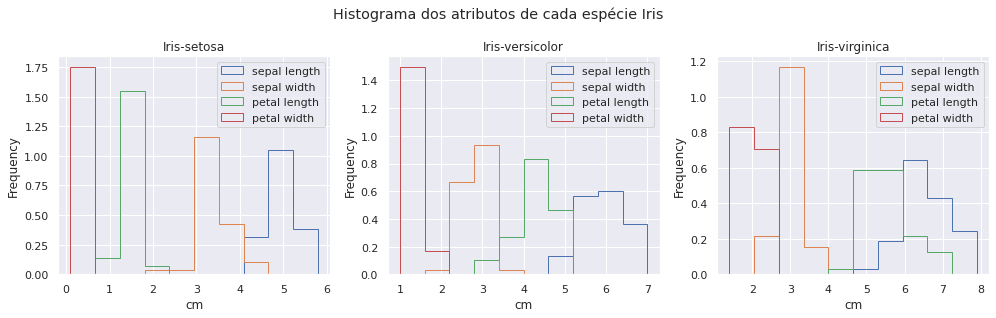

In [4]:
fig, ax = plt.subplots(ncols=3, figsize=(14,4.5))
for i in range(3):
    iris[iris['class'] == especies[i]][atributos[:-1]].plot(kind='hist', histtype='step', ax=ax[i], density=True)
    ax[i].set_title(especies[i])
    ax[i].set_xlabel("cm")
plt.suptitle("Histograma dos atributos de cada espécie Iris")
plt.tight_layout()

A figura anterior mostra os histogramas das 3 espécies para cada um dos 4 atributos. Pela figura, apenas as distribuições do comprimento e largura da sépala (*sepal width*) da Iris-virginica e a largura da pétala (*petal width*) da Iris-versicolor aparentam ter uma distribuição simétrica.

# )
Faça um gráfico de barras mostrando a média das 4 medições para as 3 espécies e o desvio padrão (stacked), de modo a poder comparar estas características entre as espécies.

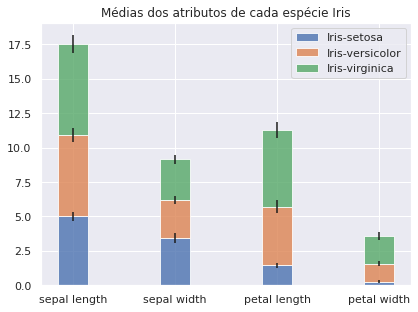

In [5]:
medias = [iris[iris['class']==e][atributos[:-1]].mean(axis=0).values for e in especies]
desvios = [iris[iris['class']==e][atributos[:-1]].std(axis=0).values for e in especies]
width=0.3
fig, ax = plt.subplots(figsize=(6, 4.5))
bottom = len(medias[0])*[0]
for i, e in enumerate(especies):
    ax.bar(atributos[:-1], medias[i], width, yerr=desvios[i], label=e, alpha=0.8, bottom=bottom)
    bottom = bottom + medias[i]
plt.title("Médias dos atributos de cada espécie Iris")
plt.legend()
plt.tight_layout()

# )
Faça um gráfico de barras no qual se possa comparar a media e a mediana das 4 medidas para as 3 espécies e comente as diferenças usando o histograma da atividade2.

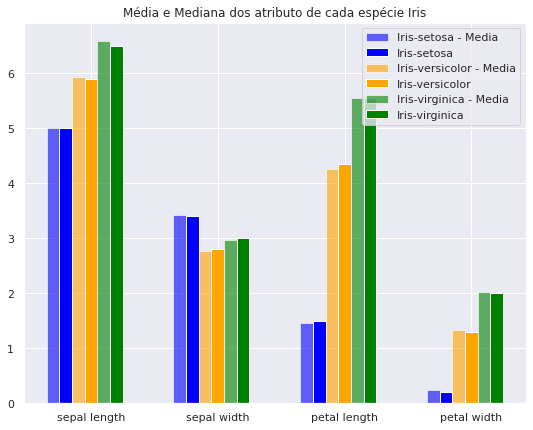

In [12]:
mediana = [iris[iris['class']==e][atributos[:-1]].median(axis=0).values for e in especies]
width=0.1
fig, ax = plt.subplots(figsize=(9, 7))
x = np.arange(len(atributos[:-1]))
colors = ['blue','orange','green']
x = x - width
for i in range(3):
    ax.bar(x, medias[i], width, label=especies[i]+" - Media", color=colors[i], alpha=0.6)
    x = x + width
    ax.bar(x, mediana[i], width, label=especies[i], color=colors[i])
    x = x + width
ax.set_xticks(x-(3*width) , atributos[:-1])
plt.title("Média e Mediana dos atributo de cada espécie Iris")
plt.legend(loc='upper right')

O grafo de barras da figura anterior sumariza todos os valores em duas medidas (mediana e média), de forma que é difícil identificar outras características dos dados obtidos. Como no histograma calcula-se a frequência dos valores, é possível identificar, além do valor da média, outros valores (acima ou abaixo da média) que sejam interessantes sobre os dados.

# )
Compare a variabilidade das 4 medidas das espécies usando o boxplot (atividade 1) e o gráfico de barras (atividade 3)

Para a Iris-setosa, o boxplot mostra que as métricas referentes à sépala tem maior variabilidade (diferença entre o terceiro e primeiro quartil). Na Iris-versicolor, os atributos com maior varibilidade são referentes às sépalas e ao comprimento da pétala. E para a Iris-virginica, os atributos com maior variabilidade são o comprimento da pétala e sépala. Como o boxplot desconsidera possíveis valores discrepantes (*outliers*), a variabilidade mostrada por ele não sofre influência de tais valores. Assim, ao comparar-se a variabilidade exibida pela figura da atividade 3 com o boxplot, o bocplot apresenta valores mais confiáveis, jé que a variabilidade não foi influenciada pelos *outliers*.

# )
Compare o boxplot (atividade 1) e histograma (atividade 2). Que informações podem ser obtidas em cada um?

O boxplot permite identificar claramente as medianas das distribuições dos dados, bem como onde grande parte de cada atributo se encontra. O histograma, por sua vez, auxilia na identificação dos valores que mais ocorrem em cada atributo. Usando os dois em conjunto, é possível entender melhor cada figura. Por exemplo, o histograma pode indicar quais valores correspondem aos *outliers* presentes no boxplot, bem como quais valores são responsáveis pelo posicionamento da mediana no boxplot.

# )
Compare o desvio padrão e o coeficiente de variação para medir a dispersão das 4 medidas nas 3 espécies. Use o gráfico que jugar mais conveniente.

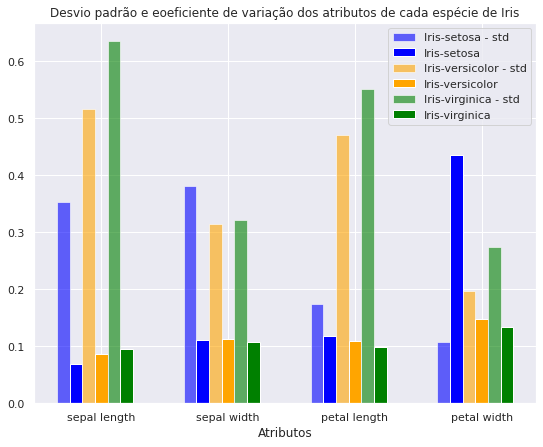

In [13]:
std_var = [iris[iris['class']==e][atributos[:-1]].std(axis=0).values for e in especies]
coef_var = [variation(iris[iris['class']==e][atributos[:-1]]) for e in especies]
width=0.1
fig, ax = plt.subplots(figsize=(9, 7))
x = np.arange(len(atributos[:-1]))
colors = ['blue','orange','green']
x = x - width
for i in range(3):
    rects1 = ax.bar(x, std_var[i], width, label=especies[i]+" - std", color=colors[i], alpha=0.6)
    x = x + width
    rects1 = ax.bar(x, coef_var[i], width, label=especies[i], color=colors[i])
    x = x + width
ax.set_xticks(x-(3*width) , atributos[:-1])
plt.title("Desvio padrão e eoeficiente de variação dos atributos de cada espécie de Iris")
plt.xlabel("Atributos")
plt.legend(loc='upper right')
plt.show()

# )
Faça um gráfico de barras 3D onde se possa ver as medias das 4 medições para as 3 espécies.

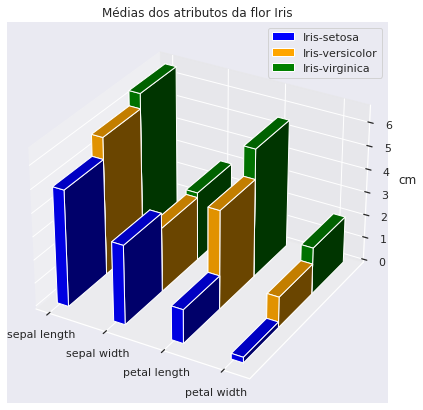

In [11]:
x = np.arange(4)
y = np.ones_like(x)
bottom = np.zeros_like(medias[0])
colors = ['blue','orange','green']
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
yd = [0, 1, 2]
bs = []
for i in range(3):
    ax.bar3d(x, y+yd[i], bottom, .2, 1, medias[i], color=colors[i])
    # para adicionar a legenda
    bs.append(plt.Rectangle((0, 0), 1, 1, fc=colors[i]))
ax.set_xticks(x, atributos[:-1])
ax.set_yticks([])
ax.set_zlabel("cm")
ax.set_title("Médias dos atributos da flor Iris")
# define a legenda manualmente. A maneira comum causa um erro
plt.legend(bs, especies)
plt.show()